## Algorithm Overview

The below code provides a simple **particle swarm algorithm** that attempts to minimize the **2D Schwefel Function** (see figure below). This function is a commonly used benchmark to test metaheuristic methods, as the minimized value is known to be zero, and located at x=y=420.969. Note that the function is defined between +-500 on both the x and y axes.

The particle swarm framework provided here is not overly complex, but provides a baseline from which more complex methods can be applied. The algorithm was implemented as a class, and takes arguments for swarm size, particle dimensions, initial particle velocity, inertial weight, velocity upper limit, velocity lower limit, phi2, phi2, and an average velocity value at which the algorithm will stop.

* **swamSize**: Sets the number of particles present in the swarm.
* **dimensions**: Sets the number of dimensions each particle will have. Since this is solving the 2D Schwefel function, this value is equal to two.
* **initialVelocity**: Sets the initial velocity of all the particles.
* **inertialWeight**: Sets the multiplier on velocity from period t to t+1.
* **velUpperLimit**: Sets an upper bound on velocity.
* **velLowerLimit**: Sets a lower bound of velocity.
* **phi1**: Sets the phi1 parameter.
* **phi2**: Sets the phi2 parameter.
* **velStopping**: Sets the average velocity needed to stop the algorithm.

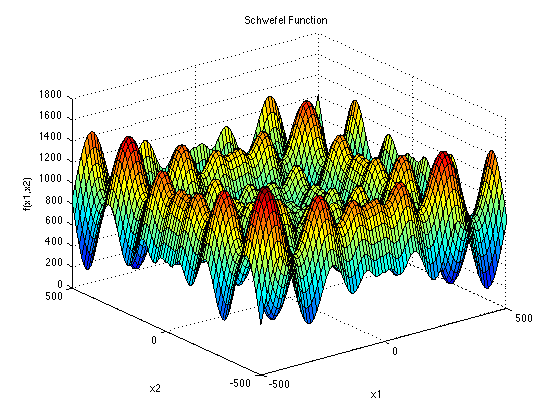

### **Figure 1**: Visual representation of 2D Schwefel Function.

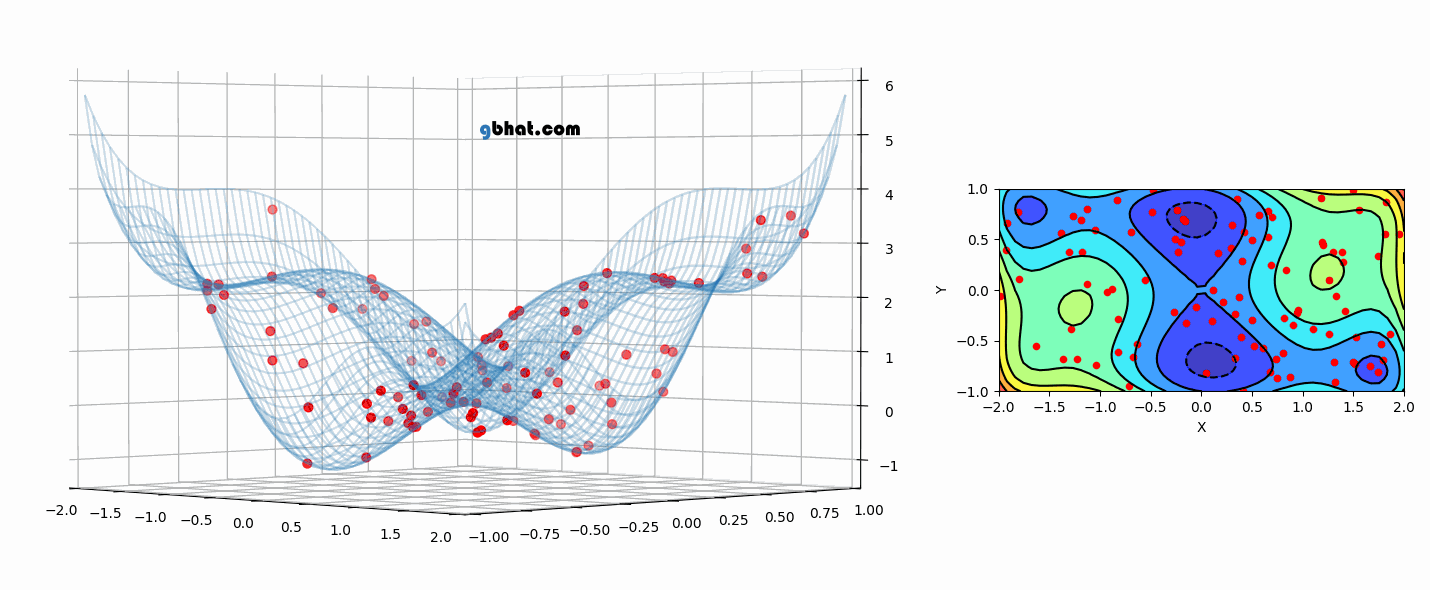

### **Figure 2**: Visual representation of particle swarm optimization.

## Importing Libraries

The math, numpy, and random libraries are used to make the algorithm run. The time library is used to track the computation duration. Additionally, a seed value of 12345 was set to ensure reproducable results.

In [5]:
import math
import numpy as np
from random import Random
import time


seed = 12345
myPRNG = Random(seed)

## Creating Particle Swarm Class

In [6]:
class particleSwarm():
    def __init__(self, dimensions, swarmSize, initialVelocity, inertialWeight, velUpperLimit, velLowerLimit, phi1, phi2, velStopping):
        self.dimensions = dimensions
        self.swarmSize = swarmSize
        self.initialVelocity = initialVelocity
        self.inertialWeight = inertialWeight
        self.velUpperLimit = velUpperLimit
        self.velLowerLimit = velLowerLimit
        self.phi1 = phi1
        self.phi2 = phi2
        self.velStopping = velStopping

    # ____________________________________
    # Create logic for evaluating particle
    def evaluate(self, particle):
        val = 0                                                               # Initialize a value to zero
        d = len(particle)                                                     # Represents the dimensions of each particle
        for i in range(d):                                                    # Iterate over each particle's dimensions
                val = val + particle[i]*math.sin(math.sqrt(abs(particle[i]))) # Update value based on Schwefel Function
        val = 418.9829*d - val                                                # Finish the computation
        return val

    # ___________________________________
    # Create logic for initializing swarm
    def initializeSwarm(self):
         pos = [[] for _ in range(self.swarmSize)] # Create an empty list to hold particle positions
         vel = [[] for _ in range(self.swarmSize)] # Create an empty list to hold particle valocities
         curVal = []                               # Create an empty list to hold particle values
         pBest = []                                # Create list to hold each particle's best positions
         pBestVal = []                             # Create list to hold each particle's best value
         lowerBound = -500                         # Set lower bound for position to -500
         upperBound = 500                          # Set upper bound for position o 500
         gBest = math.inf                          # Initialize best position found to infinity
         gBestVal = math.inf                       # Initialize best value found to infinity

         for i in range(self.swarmSize):                             # Iterate through swarm
            for j in range(self.dimensions):                         # Iterate through dimensions
                pos[i].append(myPRNG.uniform(lowerBound,upperBound)) # Append random value for starting position
                vel[i].append(self.initialVelocity)                  # Set initial velocity to random value
            curVal.append(self.evaluate(pos[i]))                     # Evaluate the current position
            if curVal[i] < gBestVal:                                 # Update gBest
                 gBestVal = curVal[i]                                # Update gBest value
                 gBest = pos[i]                                      # Update gBest position
         pBest = pos[:]                                              # Initialize particle best position
         pBestVal = curVal[:]                                        # Initialize particle best value
         return pos, vel, curVal, pBest, pBestVal, gBest, gBestVal
    
    # _______________________________
    # Create logic to update velocity
    def updateVel(self, vel, pos, pBest, gBest):
         updatedVel = [[] for _ in range(self.swarmSize)] # Create empty list to hold updated velocity values
         vel = np.array(vel)                              # Transform velocity list to array for computation

         for i in range(self.swarmSize):                               # Iterate through swarm
            r1 = [myPRNG.uniform(0,1) for _ in range(self.dimensions)] # Randomly generate r1
            r2 = [myPRNG.uniform(0,1) for _ in range(self.dimensions)] # Randomly generate r2
            
            inertia = self.inertialWeight * vel[i]                                        # Compute inertia
            cognativeComponent = self.phi1 * r1 * (np.array(pos[i] - np.array(pBest[i]))) # Compute the cognative component
            socialComponent = self.phi2 * r2 * (np.array(pos[i]) - np.array(gBest))       # Compute the social component

            candidateVel = inertia + cognativeComponent + socialComponent # Compute the candidate velocity

            for j in range(self.dimensions):                                                     # Iterte through particle dimensions
                if candidateVel[j] < self.velLowerLimit or candidateVel[j] > self.velUpperLimit: # Check if velocity is feasible
                    candidateVel[j] = myPRNG.uniform(self.velLowerLimit, self.velUpperLimit)     # Randomly reset if needed

            updatedVel[i]=list(candidateVel) # Update velocity
         return updatedVel
    
    # ___________________________________________________
    # Create logic to update position and particle values
    def updatePosAndVals(self, pos, updatedVel):
        updatedPos = [[] for _ in range(self.swarmSize)] # Create list to hold updated positions
        updatedVal = [[] for _ in range(self.swarmSize)] # Create list to hold updated values

        for i in range(self.swarmSize):                                      # Iterate through swarm size
            updatedPos[i] = list(np.array(pos[i]) + np.array(updatedVel[i])) # Update particle position
            for j in range(self.dimensions):                                 # Iterate through particle dimensions
                if updatedPos[i][j] > 500 or updatedPos[i][j] < -500:        # Check if feasible
                    updatedPos[i][j] = myPRNG.uniform(-500, 500)             # Randomly reset if needed

        for i in range(self.swarmSize):                  # Iterate through swarmsize
            updatedVal[i] = self.evaluate(updatedPos[i]) # Evalute new particle position
        return updatedPos, updatedVal
    
    # ____________________________________________________________
    # Create logic to update both particle, and global best values
    def updateBest(self, updatedPos, updatedVal, pBest, pBestVal, gBest, gBestVal):
        for _ in range(self.swarmSize):      # Iterate through swarmsize
            if updatedVal[_] < pBestVal[_]:  # Compare each new particle value with the old value
                pBestVal[_] = updatedVal[_]  # If better, replace old particle best value
                pBest[_] = updatedPos[_]     # If better, replace old particle best position

            if updatedVal[_] < gBestVal: # Compare each new particle value with global best
                gBestVal = updatedVal[_] # If better, replace old global best value
                gBest = updatedPos[_]    # If better, replace old global best position
        return pBest, pBestVal, gBest, gBestVal
    
    # ______________________________________________
    # Compute the average velocity among total swarm
    def averageVel(self, vel):
        summedVel = 0                        # Initialize a summation variable to zero
        for i in range(self.swarmSize):      # Iterate through swarmsize
            for j in range(self.dimensions): # Iterate through dimensions
                summedVel += vel[i][j]       # Update the summed values
        return summedVel/self.swarmSize      # Return the average velocity

    # ____________________________________
    # Create logic to run PSO optimization
    def runParticleSwarm(self):
        t0 = time.process_time()                                                    # Initialize a timer
        pos, vel, curVal, pBest, pBestVal, gBest, gBestVal = self.initializeSwarm() # Initialize starting values

        while abs(self.averageVel(vel)) > self.velStopping:                                                   # Run until stopping criteria met
            vel = self.updateVel(vel, pos, pBest, gBest)                                                      # Update velocity
            pos, curVal = self.updatePosAndVals(pos, vel)                                                     # Update position and value
            pBest, pBestVal, gBest, gBestVal = self.updateBest(pos, curVal, pBest, pBestVal, gBest, gBestVal) # Update remaining features

        procTime = time.process_time() - t0                                             # Stop the timer
        return ({"BestSolution":gBest, "BestValue":gBestVal, "ProcessorTime":procTime}) # Return best values

## Testing Algorithm

In [8]:
# Create a class object:
x = particleSwarm(dimensions=2,
                  swarmSize=25,
                  initialVelocity=100,
                  inertialWeight=0.99,
                  velLowerLimit=-500,
                  velUpperLimit=500,
                  phi1=1,
                  phi2=1,
                  velStopping=.01)

# Call method to run algorithm:
y = x.runParticleSwarm()

# Observe results:
print("Best solution found:", y["BestSolution"])
print("Best value:", y["BestValue"])
print("Processor time to complete (seconds):", y["ProcessorTime"])

Best solution found: [421.4717436319878, 421.63274204945617]
Best value: 0.08760252328920615
Processor time to complete (seconds): 6.331942864


In just 6.332 seconds, the algorithm was able to converge to a near-optimal result. The best value found was 0.088, and was located at [421.472, 421.633]. Clearly, while this is a basic particle swarm algorithm it produces great results in a very reasonable time span.